In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df =pd.read_csv("drive/MyDrive/Colab Notebooks/bank_transactions.csv")
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [7]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [4]:
df.shape

(1048567, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


**DATA CLEANING**

In [8]:
#checking the nan values
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [9]:
# percentage of missing values out of total
round(df.isnull().sum()*100/df.shape[0],2)

,0
TransactionID,0.00
CustomerID,0.00
CustomerDOB,0.32
CustGender,0.10
CustLocation,0.01
CustAccountBalance,0.23
TransactionDate,0.00
TransactionTime,0.00
TransactionAmount (INR),0.00


In [10]:
df.duplicated().sum()

0

In [12]:
df['Age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
df.sample(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
616894,T616895,C2718543,1800-01-01,M,SCHOOL KALYAN W,9570.43,2016-08-26,213549,2007.45,216.0
357004,T357005,C6013637,1980-03-03,M,HYDERABAD,21567.37,2016-08-14,190122,890.00,36.0
115873,T115874,C6423338,1995-04-22,M,PAREL MUMBAI,30214.22,2016-06-08,131116,1299.00,21.0
7582,T7583,C8313377,1992-02-28,F,MOGA,14756.99,2016-09-25,190201,1000.00,24.0
262304,T262305,C3725414,1979-09-01,F,MUMBAI,50665.97,2016-12-08,193107,2610.00,37.0


In [13]:
df.Age.dtype

dtype('float64')

In [14]:
df1 = df[df['Age'].between(18, 80)]
df1.shape[0]

891919

Customers could be only between 18 and 80 years old. Remove unnecessary rows.

In [15]:
index_names = df[(df['Age'] < 18) | (df['Age'] > 80)].index
df.drop(index_names, inplace = True)
df.shape

(895316, 10)

In [16]:
df.Age.isna().sum()

3397

In [17]:
len(df['TransactionID'].unique())

895316

In [18]:
len(df['CustomerID'].unique())

772979

In [19]:
#check non numerical columns
df.describe(include = 'object')

,TransactionID,CustomerID,CustGender,CustLocation
count,895316,895316,895253,895205
unique,895316,772979,2,7638
top,T1,C1026833,M,MUMBAI
freq,1,6,647425,88531


In [20]:
#check the numerical columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
CustomerDOB,891919,1987-08-06 00:56:15.815068416,1974-01-01 00:00:00,1984-02-07 00:00:00,1988-06-22 00:00:00,1991-08-26 00:00:00,1998-12-13 00:00:00,NaN
CustAccountBalance,893368.0,80159.703035,0.0,4252.75,14732.23,47238.0,43165555.53,379916.024149
TransactionDate,895316,2016-07-25 09:20:11.151370240,2016-01-08 00:00:00,2016-06-09 00:00:00,2016-08-20 00:00:00,2016-09-09 00:00:00,2016-12-09 00:00:00,NaN
TransactionTime,895316.0,157598.413442,0.0,124306.75,164928.0,200433.0,235959.0,51674.443831
TransactionAmount (INR),895316.0,1294.46557,0.0,147.0,400.0,1012.0,1560034.99,5462.740341
Age,891919.0,28.898167,18.0,25.0,28.0,32.0,42.0,5.308623


In [21]:
df[df['TransactionAmount (INR)']==0].shape

(639, 10)

In [22]:
df[df['TransactionTime']==0].shape

(3, 10)

There are 3 records where the transaction time is 0 min. There are 639 records where transaction amount is 0 INR. Let's drop these records.

In [23]:
index_names2 = df[(df['TransactionAmount (INR)']==0) | (df['TransactionTime']==0)].index
df.drop(index_names2, inplace = True)
df.shape

(894674, 10)

# **Explore the dataset.**

In [24]:
df['CustLocation'].value_counts().reset_index()

,CustLocation,count
0,MUMBAI,88467
1,BANGALORE,71597
2,NEW DELHI,67477
3,GURGAON,63723
4,DELHI,61491
...,...,...
7631,KANDIWALI EAST,1
7632,SANTACRUZ (EAST) MUMBAI,1
7633,LUDHIANA LUDHIANA,1
7634,QUTHBULLAPUR,1


In [25]:
df.CustGender.value_counts(normalize = True).reset_index()

,CustGender,proportion
0,M,0.723102
1,F,0.276898


In [26]:
df.sort_values(by = ["CustAccountBalance", "TransactionAmount (INR)"], ascending = [False, False]).head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
1048086,T1048087,C8338953,1981-08-08,M,GURGAON,43165555.53,2016-09-18,90633,230.00,35.0
152599,T152600,C1724444,1974-11-21,M,MUMBAI,36090853.96,2016-04-08,123927,161.42,42.0
167766,T167767,C8524436,1974-11-21,M,MUMBAI,36090853.96,2016-04-08,135723,131.35,42.0
923557,T923558,C3933671,1981-09-26,M,RAJKOT,27979586.92,2016-11-09,121118,39582.28,35.0
90592,T90593,C1633640,1981-09-26,M,RAJKOT,27979586.92,2016-09-27,192632,31000.00,35.0


In [27]:
df.groupby('CustGender')[['CustAccountBalance', 'TransactionAmount (INR)']].agg(['min', 'max', 'mean'])

CustAccountBalance                             \
                          min          max          mean   
CustGender                                                 
F                         0.0  14451356.76  75986.162084   
M                         0.0  43165555.53  81656.545559   

           TransactionAmount (INR)                           
                               min         max         mean  
CustGender                                                   
F                             0.01  1380002.88  1464.787662  
M                             0.01  1560034.99  1229.872157

In [28]:
df.groupby('Age')[['CustAccountBalance', 'TransactionAmount (INR)']].agg(['min', 'max', 'mean'])

CustAccountBalance                             TransactionAmount (INR)  \
                    min          max           mean                     min   
Age                                                                           
18.0               0.44  10268800.62   30950.199364                    0.49   
19.0               0.00   2089425.75   28795.226971                    0.01   
20.0               0.00   2249370.54   30770.801947                    0.01   
21.0               0.00   3135444.31   25495.095527                    0.01   
22.0               0.00   1497456.64   24042.420585                    0.13   
23.0               0.00   6903931.76   30479.108676                    0.01   
24.0               0.00   7004727.98   40546.155691                    0.01   
25.0               0.00  16834937.99   40209.245436                    0.01   
26.0               0.00   6464804.71   46156.370798                    0.01   
27.0               0.00   9198576.98   66985.037454                    0.01   
28.0               0.00  11091701.10   64381.706477                    0.01   
29.0               0.00  14276260.10   79025.312471                    0.01   
30.0               0.00  12343905.63   83514.229640                    0.46   
31.0               0.00  21696661.00   92105.189442                    0.01   
32.0               0.00  15715987.76  102107.584766                    0.01   
33.0               0.00  15436498.08   97182.993504                    0.35   
34.0               0.00   9141893.63  110710.129182                    0.01   
35.0               0.00  43165555.53  136620.594150                    1.00   
36.0               0.00  10336819.09  155076.236483                    1.00   
37.0               0.00  14451356.76  144499.232974                    0.95   
38.0               0.00  14472840.56  157624.613423                    0.13   
39.0               0.00  10514477.12  167248.400049                    0.13   
40.0               0.00  20773103.40  186016.555854                    0.20   
41.0               0.00  15158474.07  195781.946248                    0.13   
42.0               0.00  36090853.96  266446.962960                    0.05   

                               
             max         mean  
Age                            
18.0    56368.23  1290.930451  
19.0   200001.24   838.568861  
20.0    63826.00   750.396229  
21.0   100000.00   743.089402  
22.0   158134.00   753.028635  
23.0   350000.00   866.519239  
24.0   310002.83   853.112231  
25.0   130000.00   941.375440  
26.0   150000.00  1019.210072  
27.0   600003.45  1116.520613  
28.0   600008.32  1242.745713  
29.0   314694.08  1285.205244  
30.0   378415.46  1362.594961  
31.0   720001.16  1475.681116  
32.0   168192.00  1588.439444  
33.0   561001.00  1617.726666  
34.0   278800.18  1698.200091  
35.0   525003.83  1663.800365  
36.0   455122.00  1813.750805  
37.0   378006.07  1992.266735  
38.0  1380002.88  1905.927418  
39.0   514320.00  2005.368591  
40.0  1560034.99  2245.373502  
41.0   207520.00  2096.345608  
42.0   299009.96  2362.886901

In [29]:
df.pivot_table(['CustAccountBalance', 'TransactionAmount (INR)'], ['CustomerID'], aggfunc = "mean").sort_values(by = ["TransactionAmount (INR)"], ascending = False)

,CustAccountBalance,TransactionAmount (INR)
CustomerID,,
C7319271,42487.89,1560034.99
C6677159,98660.33,1380002.88
C4141768,83608.10,991132.22
C1830891,14177.65,720001.16
C6549785,29198.46,600008.32
...,...,...
C7611275,3855.62,0.01
C4912976,201.98,0.01
C3714264,0.02,0.01


In [30]:
df1 = df.loc[df['TransactionAmount (INR)'] < df['CustAccountBalance']]
df1.shape

(802613, 10)

In [31]:
df1['BalanceTransactionRatio'] = df1['TransactionAmount (INR)']/df1['CustAccountBalance']*100
df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,BalanceTransactionRatio
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22.0,0.140299
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20.0,2.567913
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28.0,26.249436
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,24.0,58.143118
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.0,34.0,0.155666


In [32]:
df1.groupby(['CustGender', 'Age'])['BalanceTransactionRatio'].agg(['max', 'mean'])

max       mean
CustGender Age                       
F          18.0  94.410876   8.118091
           19.0  99.888230   9.025277
           20.0  98.912164   7.998780
           21.0  99.577664   8.813506
           22.0  99.340885   8.193830
           23.0  99.714106   8.163704
           24.0  99.979954   8.495339
           25.0  99.829392   7.533423
           26.0  99.948956   8.017975
           27.0  99.925056   7.751879
           28.0  99.472864   7.544404
           29.0  99.970409   7.125763
           30.0  99.195060   7.137497
           31.0  99.855363   7.507089
           32.0  99.857718   7.437416
           33.0  99.757945   7.742044
           34.0  99.780597   6.988587
           35.0  99.700897   7.253706
           36.0  99.335511   8.246772
           37.0  99.796334   6.683801
           38.0  99.755041   7.377213
           39.0  99.619050   6.831608
           40.0  99.175782   6.773443
           41.0  98.921453   6.567647
           42.0  96.164195   7.500177
M          18.0  99.656434   7.892870
           19.0  99.940556  10.757290
           20.0  99.502488   9.069472
           21.0  99.869679   9.539305
           22.0  99.984927   8.985200
           23.0  99.974366   8.550533
           24.0  99.894180   8.668074
           25.0  99.833611   8.289706
           26.0  99.940036   8.100649
           27.0  99.993640   8.092710
           28.0  99.916736   7.940619
           29.0  99.992691   7.889256
           30.0  99.955933   7.449011
           31.0  99.956117   7.506146
           32.0  99.923977   7.775524
           33.0  99.715385   7.785493
           34.0  99.857266   7.703233
           35.0  99.900100   6.755025
           36.0  99.959017   7.540051
           37.0  99.780483   8.556942
           38.0  99.462770   7.274881
           39.0  99.820096   7.463586
           40.0  99.974520   7.284418
           41.0  99.932546   7.761634
           42.0  99.834445   7.359196

The average balance-to-transaction ratio is greater for young customers (under 35) and it decreases for older persons.

# **Data Visualization**

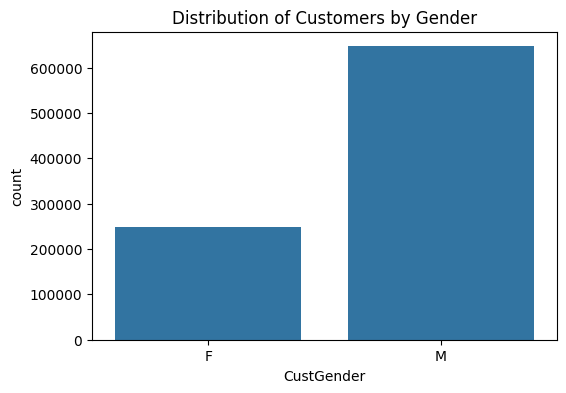

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender',data = df)
plt.title('Distribution of Customers by Gender')
plt.show()

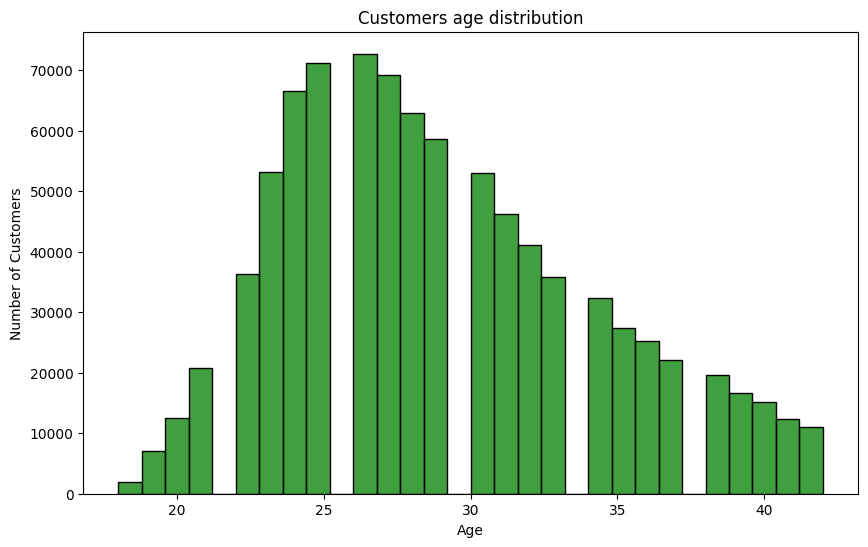

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=False, color='green')
plt.title('Customers age distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

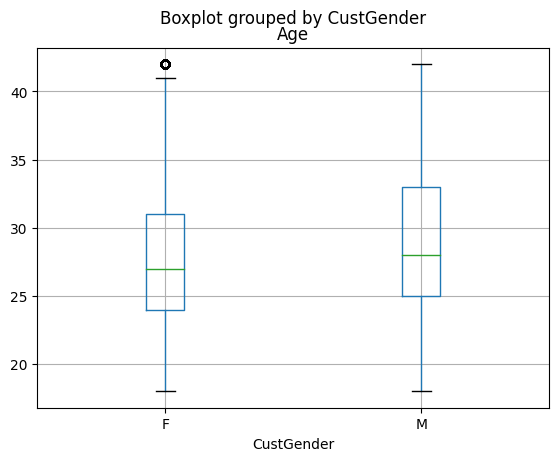

In [35]:
df.boxplot(column = "Age",
           by = "CustGender")
plt.show()

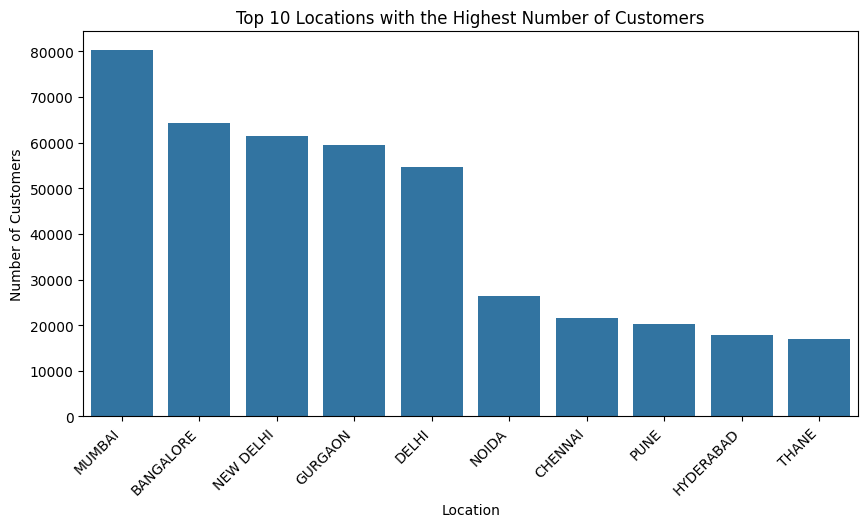

In [36]:
location_counts = df1['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title('Top 10 Locations with the Highest Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
def age_group(age):
    if age < 20:
        return 'Below 20'
    elif age >= 20 and age <= 30:
        return '20 - 30'
    elif age > 30 and age <= 40:
        return '31 - 40'
    elif age > 40 and age <= 50:
        return '41 - 50'
    elif age > 50 and age <= 60:
        return '51 - 60'
    elif age >60 and age <= 70:
        return '61 - 70'
    else:
        return 'Above 71'

df['age_group'] = df['Age'].apply(age_group)

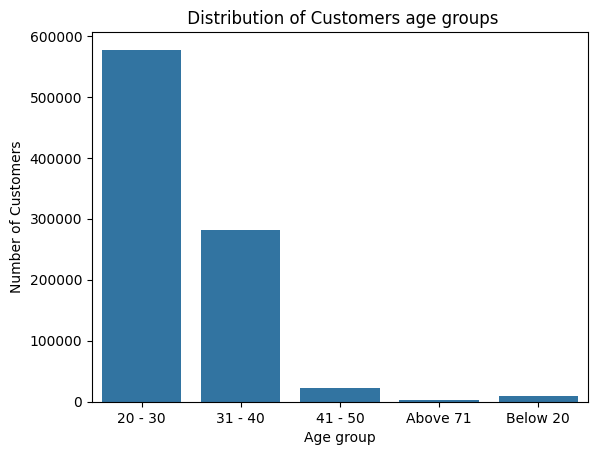

In [38]:

sns.countplot(x = df['age_group'].sort_values())
plt.title(' Distribution of Customers age groups')
plt.xlabel('Age group')
plt.ylabel('Number of Customers')
plt.show()

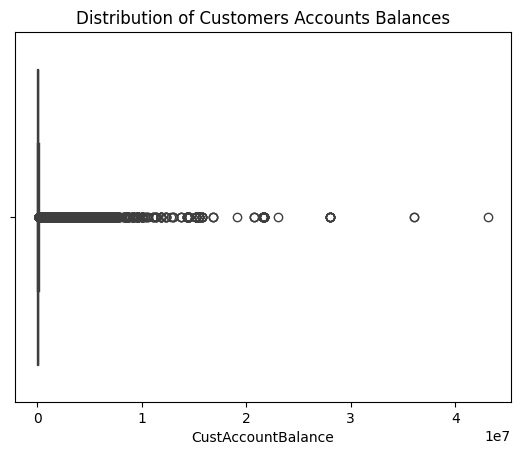

In [39]:
sns.boxplot(df, x = 'CustAccountBalance')
plt.title('Distribution of Customers Accounts Balances')
plt.show()

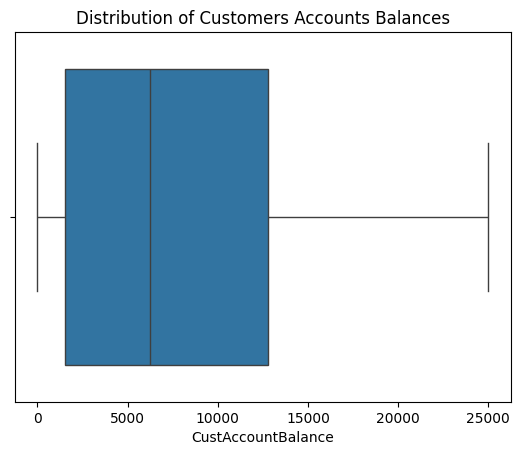

In [40]:
sns.boxplot(df[df['CustAccountBalance'].between(0,25000)], x = 'CustAccountBalance')
plt.title('Distribution of Customers Accounts Balances')
plt.show()

In [41]:
df['TransactionMonth'] = df['TransactionDate'].dt.month
df.sample(2)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,age_group,TransactionMonth
539900,T539901,C7037312,1984-09-01,M,BANGALORE,2366.26,2016-08-22,90317,725.0,32.0,31 - 40,8
160091,T160092,C6615790,1975-06-19,M,GUNTUR,530.62,2016-04-08,42216,200.0,41.0,41 - 50,4


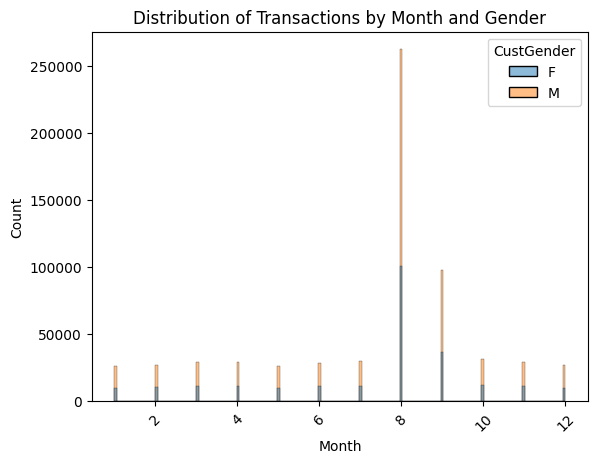

In [42]:
sns.histplot(data=df, x='TransactionMonth', hue='CustGender', kde=False)
plt.title('Distribution of Transactions by Month and Gender')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

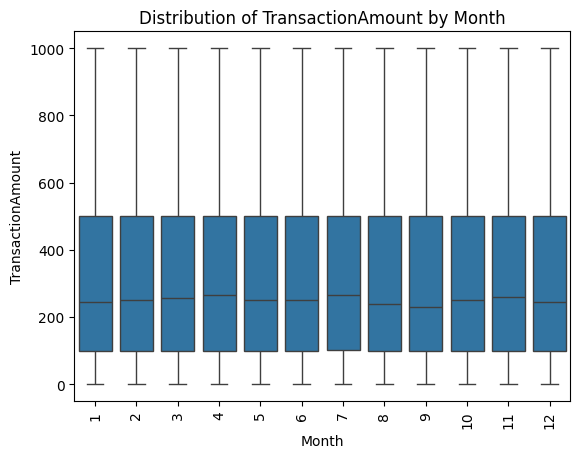

In [43]:
df2 = df[df['TransactionAmount (INR)'].between(0,1000)]
sns.boxplot(data=df2, x='TransactionMonth', y='TransactionAmount (INR)')
plt.title('Distribution of TransactionAmount by Month')
plt.xlabel('Month')
plt.ylabel('TransactionAmount')
plt.xticks(rotation=90)
plt.show()

In [44]:
df3 = df[['CustAccountBalance','TransactionAmount (INR)','Age', 'TransactionMonth']]
corr_matrix = df3.corr()
corr_matrix

,CustAccountBalance,TransactionAmount (INR),Age,TransactionMonth
CustAccountBalance,1.000000,0.064974,0.123280,0.004302
TransactionAmount (INR),0.064974,1.000000,0.073513,-0.003636
Age,0.123280,0.073513,1.000000,-0.002709
TransactionMonth,0.004302,-0.003636,-0.002709,1.000000


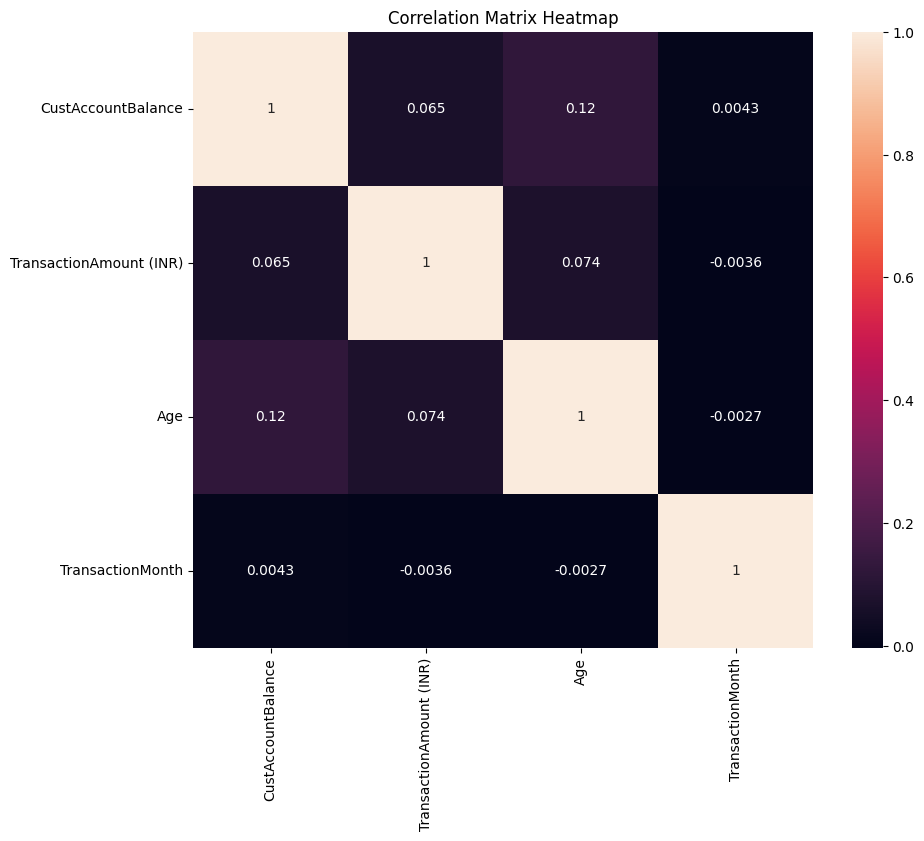

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2g')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Top 10 Transaction Dates when least number of Transactions are made**

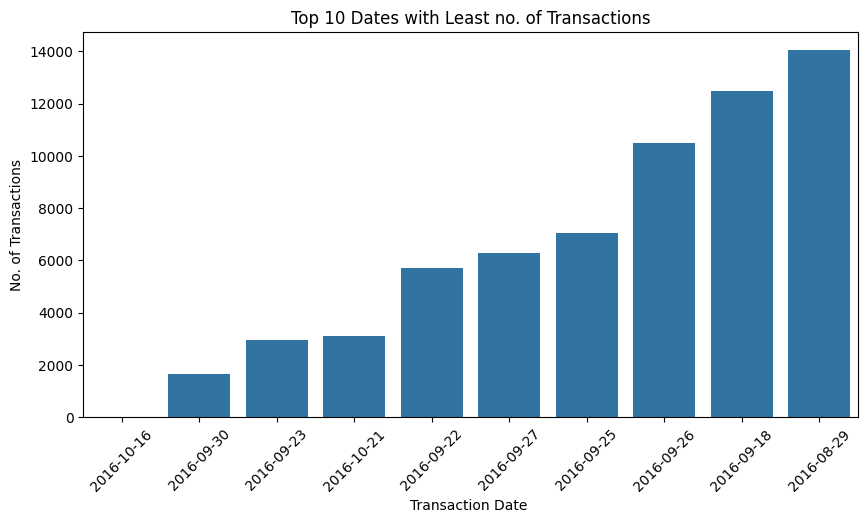

In [46]:
least_tr_dates = df.groupby('TransactionDate').agg('count').reset_index().sort_values(by = 'TransactionAmount (INR)').head(10)
plt.figure(figsize = [10,5])
sns.barplot(x = least_tr_dates['TransactionDate'].dt.date,y = least_tr_dates['TransactionAmount (INR)'] )
plt.title('Top 10 Dates with Least no. of Transactions')
plt.xlabel('Transaction Date ')
plt.ylabel('No. of Transactions')
plt.xticks(rotation=45)
plt.show()

In [47]:
import datetime
df['Transaction_Time'] = df['TransactionTime'].apply(lambda x : datetime.datetime.fromtimestamp(int(x)).strftime('%H:%M '))
df.sample(2)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,age_group,TransactionMonth,Transaction_Time
862161,T862162,C2231659,1993-10-19,M,VISAKHAPATNAM,53641.73,2016-08-09,122645,2395.0,23.0,20 - 30,8,10:04
427010,T427011,C2141821,1984-10-19,F,NEW DELHI,38817.76,2016-08-17,184415,1448.0,32.0,31 - 40,8,03:13


In [48]:
def time_division(time):

    if time >= '06:00' and time < '12:00':
        return 'Morning'
    elif time >= '12:00' and time < '17:00':
        return "Afternoon"
    elif time >='17:00' and time < '22:00':
        return 'Evening'
    else :
        return 'Night'


df['transaction_time_division'] = df['Transaction_Time'].apply(time_division)

Text(0, 0.5, 'No. of Transactions')

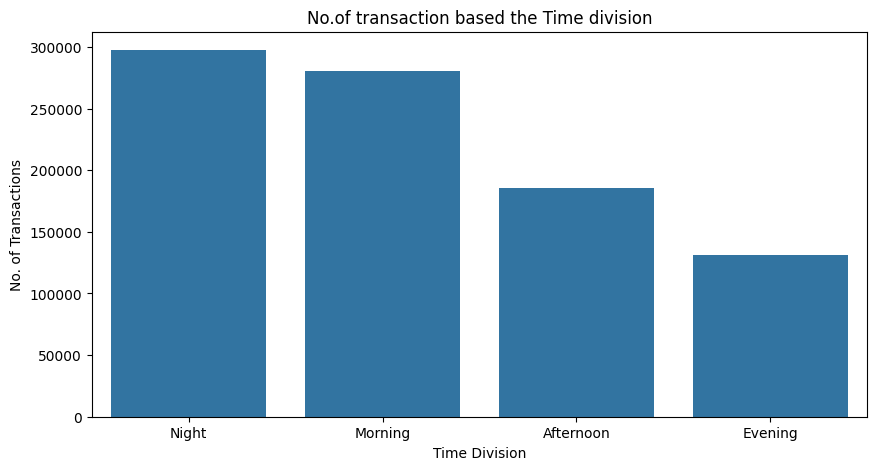

In [49]:
df_transaction_time_division = df['transaction_time_division'].value_counts().reset_index()
plt.figure(figsize = [10,5])
sns.barplot(x = df_transaction_time_division['transaction_time_division'] , y = df_transaction_time_division['count'])
plt.title('No.of transaction based the Time division')
plt.xlabel('Time Division')
plt.ylabel('No. of Transactions')

# **RFM analysis**

In [50]:
mTable = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().reset_index()
mTable

,CustomerID,TransactionAmount (INR)
0,C1010011,5106.0
1,C1010012,1499.0
2,C1010014,1455.0
3,C1010018,30.0
4,C1010028,557.0
...,...,...
772493,C9099836,691.0
772494,C9099877,222.0
772495,C9099919,126.0
772496,C9099941,50.0


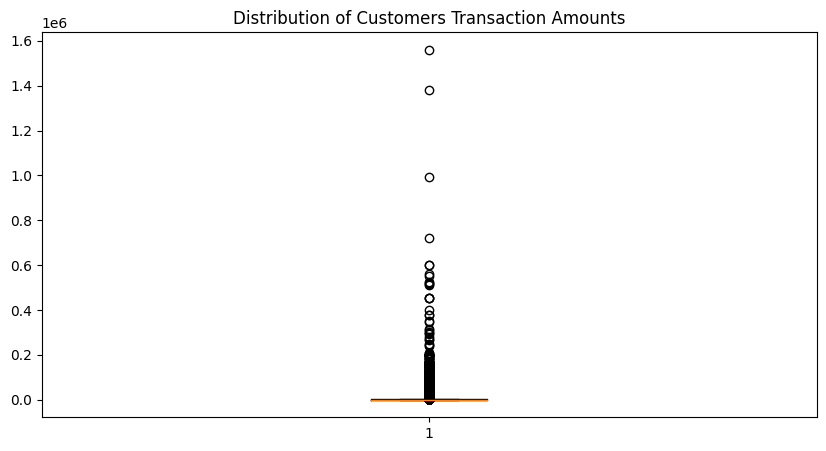

In [51]:
plt.figure(figsize = [10,5])
plt.boxplot(mTable['TransactionAmount (INR)'])
plt.title('Distribution of Customers Transaction Amounts')
plt.show()

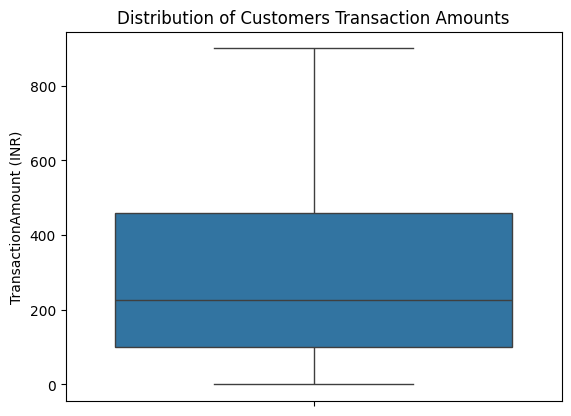

In [52]:
#reduce the spread of the data
sns.boxplot(df[df['TransactionAmount (INR)'].between(0,900)], y = 'TransactionAmount (INR)')
plt.title('Distribution of Customers Transaction Amounts')
plt.show()


In [53]:
def mclass(x):
  if x<=200:
    return 'M3'
  elif x<= 400:
    return 'M2'
  else:
    return 'M1'

In [54]:
mTable['monetary'] = mTable['TransactionAmount (INR)'].apply(mclass)
mTable

,CustomerID,TransactionAmount (INR),monetary
0,C1010011,5106.0,M1
1,C1010012,1499.0,M1
2,C1010014,1455.0,M1
3,C1010018,30.0,M3
4,C1010028,557.0,M1
...,...,...,...
772493,C9099836,691.0,M1
772494,C9099877,222.0,M2
772495,C9099919,126.0,M3
772496,C9099941,50.0,M3


In [55]:
mTable['monetary'].value_counts().sort_values(ascending=False)

,count
monetary,
M1,418701
M3,228134
M2,125663


In [56]:
fTable = df.groupby('CustomerID')['TransactionID'].nunique().sort_values(ascending=False).reset_index()
fTable

,CustomerID,TransactionID
0,C1026833,6
1,C6735477,6
2,C6222360,6
3,C4035277,5
4,C8528276,5
...,...,...
772493,C3911584,1
772494,C3911586,1
772495,C3911589,1
772496,C3911611,1


In [57]:
fTable.columns = ['CustomerID', 'transactions_count']

In [58]:
fTable['transactions_count'].describe()

,transactions_count
count,772498.000000
mean,1.158157
std,0.413136
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,6.000000


In [59]:
def fclass(x):
  if x<=1:
    return 'F3'
  elif x<= 4:
    return 'F2'
  else:
    return 'F1'

In [60]:
fTable['frequency'] = fTable['transactions_count'].apply(fclass)

In [61]:
mfTable = pd.merge(mTable, fTable, on = 'CustomerID')
mfTable

,CustomerID,TransactionAmount (INR),monetary,transactions_count,frequency
0,C1010011,5106.0,M1,2,F2
1,C1010012,1499.0,M1,1,F3
2,C1010014,1455.0,M1,2,F2
3,C1010018,30.0,M3,1,F3
4,C1010028,557.0,M1,1,F3
...,...,...,...,...,...
772493,C9099836,691.0,M1,1,F3
772494,C9099877,222.0,M2,1,F3
772495,C9099919,126.0,M3,1,F3
772496,C9099941,50.0,M3,1,F3


In [62]:
mfTable = mfTable[['CustomerID', 'monetary', 'frequency']]

In [63]:
rTable = df.groupby('CustomerID')['TransactionDate'].max().reset_index()
rTable

,CustomerID,TransactionDate
0,C1010011,2016-09-26
1,C1010012,2016-08-14
2,C1010014,2016-07-08
3,C1010018,2016-09-15
4,C1010028,2016-08-29
...,...,...
772493,C9099836,2016-07-08
772494,C9099877,2016-09-15
772495,C9099919,2016-08-18
772496,C9099941,2016-08-28


In [64]:
rTable.columns = ['CustomerID', 'last_tr_date']

In [65]:
NOW = rTable.last_tr_date.max()
NOW

Timestamp('2016-12-09 00:00:00')

In [66]:
from datetime import datetime, timedelta

In [67]:
def rclass(x):
  if x['last_tr_date']>= NOW - timedelta(days = 6*30):
    return 'R3'
  elif x['last_tr_date']>= NOW - timedelta(days = 1*30):
    return 'R2'
  else:
    return 'R1'

In [69]:
rTable['recency'] = rTable.apply(rclass, axis =1)

In [70]:
rTable

,CustomerID,last_tr_date,recency
0,C1010011,2016-09-26,R3
1,C1010012,2016-08-14,R3
2,C1010014,2016-07-08,R3
3,C1010018,2016-09-15,R3
4,C1010028,2016-08-29,R3
...,...,...,...
772493,C9099836,2016-07-08,R3
772494,C9099877,2016-09-15,R3
772495,C9099919,2016-08-18,R3
772496,C9099941,2016-08-28,R3


In [71]:
rTable['recency'].value_counts()

,count
recency,
R3,593481
R1,179017


In [72]:
rTable = rTable[['recency', 'CustomerID']]
rTable

,recency,CustomerID
0,R3,C1010011
1,R3,C1010012
2,R3,C1010014
3,R3,C1010018
4,R3,C1010028
...,...,...
772493,R3,C9099836
772494,R3,C9099877
772495,R3,C9099919
772496,R3,C9099941


In [73]:
rfmTable=pd.merge(mfTable, rTable, on = 'CustomerID')
rfmTable

,CustomerID,monetary,frequency,recency
0,C1010011,M1,F2,R3
1,C1010012,M1,F3,R3
2,C1010014,M1,F2,R3
3,C1010018,M3,F3,R3
4,C1010028,M1,F3,R3
...,...,...,...,...
772493,C9099836,M1,F3,R3
772494,C9099877,M2,F3,R3
772495,C9099919,M3,F3,R3
772496,C9099941,M3,F3,R3


In [74]:
rfmTable['groups'] = rfmTable['recency'] + rfmTable['frequency'] + rfmTable['monetary']

In [75]:
rfmTable['groups'].value_counts()

,count
groups,
R3F3M1,240103
R3F3M3,166699
R1F3M1,87543
R3F2M1,85423
R3F3M2,84414
R1F3M3,55263
R1F3M2,29590
R3F2M2,10967
R3F2M3,5805
